##Importações

In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

##Pré-processamento

In [13]:
path = r"/content/images"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
espectros = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.PNG') or file.name.endswith('.jpg') or file.name.endswith('.JPG'):
        #   # adds only the image files to the flowers list
            espectros.append(file.name)
            

## Pré-processamento para uma imagem

In [6]:
# load the image as a 224x224 array
img = load_img(espectros[0], target_size=(224,224))

# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

In [7]:
reshaped_img = img.reshape(1,224,224,3)

In [8]:
x = preprocess_input(reshaped_img)

In [9]:
# load model
model = VGG16()

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553476096/553467096 [==============================] - 7s 0us/step


In [10]:
features = model.predict(x)
# print(features.shape)

## Pré-processamento para todas as imagens

In [11]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [14]:
data = {}

# lop through each image in the dataset
for espectro in espectros:
  feat = extract_features(espectro,model)
  data[espectro] = feat

In [15]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

In [16]:
# get a list of just the features
feat = np.array(list(data.values()))

In [17]:
# reshape so that there are 210 samples of 4096 vectors
amostra = feat.reshape(-1,4096)

In [18]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(amostra)
x = pca.transform(amostra)

##Aplicando modelo k-means

In [19]:
# cluster feature vectors
kmeans = KMeans(n_clusters=3 ,n_jobs=-1, random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {} 
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# Plotagens dos Clusters

## Cluster 0

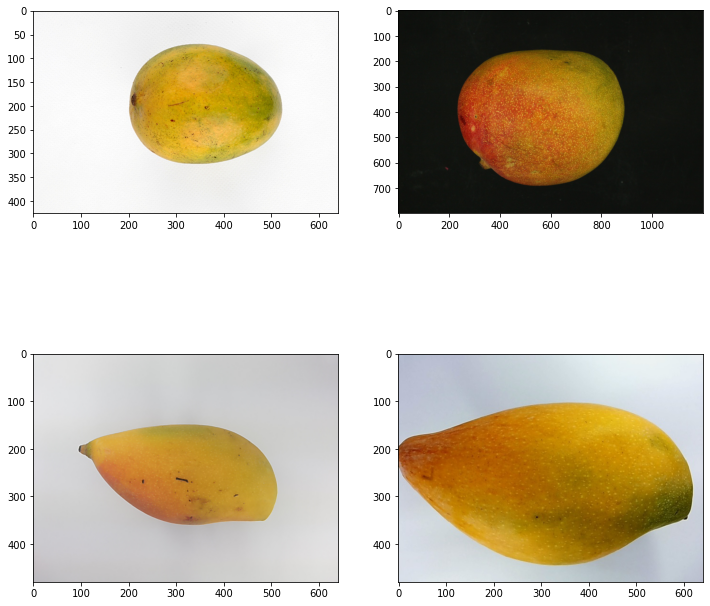

In [29]:
_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img, ax in zip(groups[0], axs):
  img = mpimg.imread("/content/images/" + img)
  ax.imshow(img)
  i+=1
  if i == 4:
    break
plt.show()

## Cluster 1

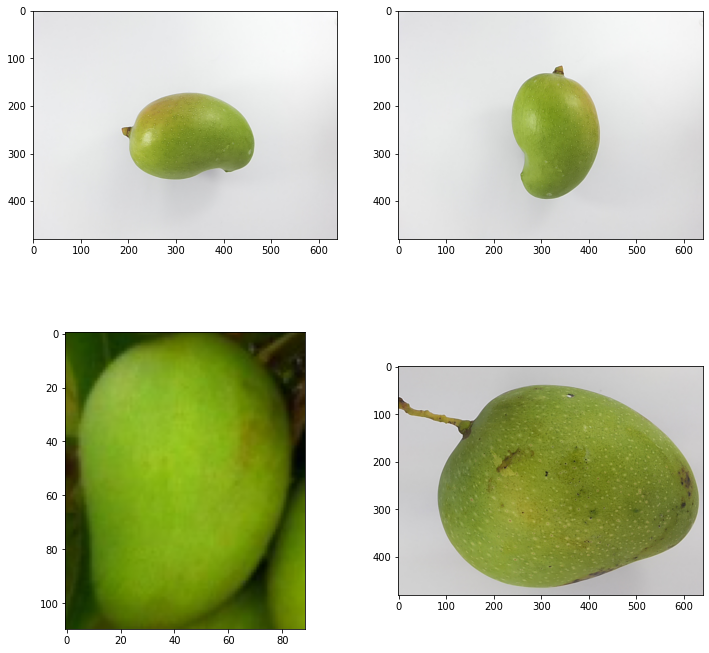

In [32]:
_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img, ax in zip(groups[1], axs):
  img = mpimg.imread("/content/images/" + img)
  ax.imshow(img)
  i+=1
  if i == 4:
    break
plt.show()

## Cluster 2

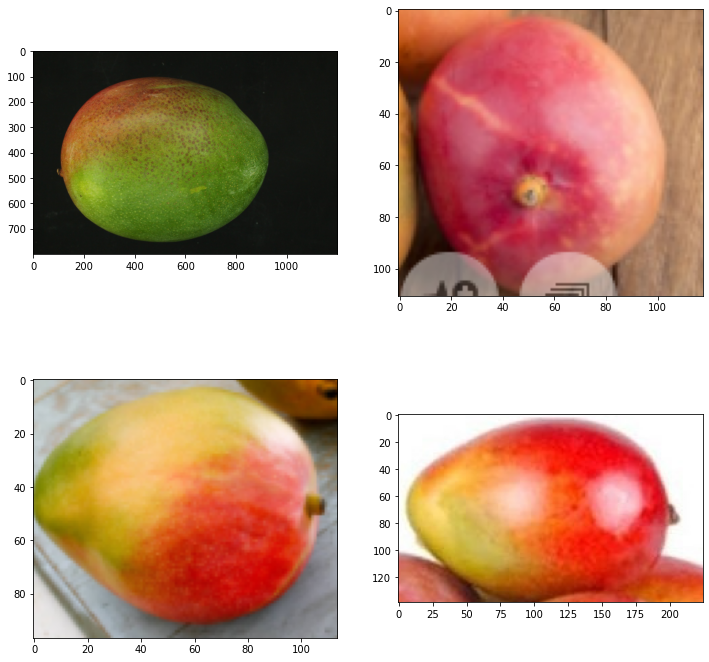

In [33]:
_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
i = 0
for img, ax in zip(groups[2], axs):
  img = mpimg.imread("/content/images/" + img)
  ax.imshow(img)
  i+=1
  if i == 4:
    break
plt.show()